## Welcome!

### Some Google Colab hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

`pygismo` is a small package, unknown to Google. Therefore, we have to install it locally inside the Notebook

In [3]:
!pip install pygismo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 45.7 MB/s eta 0:00:00


Now we can import it as a package

In [4]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

For this example, we also use a file from the drive. Therefore, we mount our Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Constructing a 2D basis

We use the same B-spline basis as in the previous example, with knot vectors:

$\Xi_u = \Xi_v = \{0,0,0,1,1,1\}$


In [6]:
kv_u = kv_v = gs.nurbs.gsKnotVector(np.array([0,0,0,1,1,1]),2)

In [7]:
tbasis = gs.nurbs.gsTensorBSplineBasis2(kv_u,kv_v)


# Definining a surface

Similar to defining a curve, we define a matrix of control points to construct a surface. For a basis of size $N$, the coefficient matrix is defined as an $N\times d$ matrix, with $d$ the geometric dimension. Furthermore, we initialize the coefficient matrix with $N\times d$ zeros.

Since our basis is composed of the same knot vector in both directions, the number of functions in each direction is $n=\sqrt{N}$.

In [8]:
coefs = np.zeros((tbasis.size(),3))
n = np.sqrt(tbasis.size())

Then, we define the control points in a uniformly spaced grid. We use `numpy.linspace` and `numpy.meshgrid` for this

In [9]:
x = np.linspace(0,1,int(n))
X,Y = np.meshgrid(x,x)
coefs[:,0] = X.flatten()
coefs[:,1] = Y.flatten()

Since the coefficient matrix is initialized with zeros, we modify a few coefficients to displace the points out-of-plane.

In [15]:
coefs[2,2] = -1
coefs[3,2] = 1
coefs[4,2] = 100
coefs[5,2] = 1

Having defined the coefficient matrix, we can make a tensor B-splne surface using the basis and the coefficient matrix.

In [16]:
surf = gs.nurbs.gsTensorBSpline2(tbasis,coefs)

# Plotting the 3D surface

We can use `matplotlib` to plot the surface here in python. As always, we start by creating a set of parametric points. Here, they stored in `x` and `y`, on their turn used to construct a `numpy.meshgrid`. The grid is used to create a matrix of parametric points to evaluate the surface on. The matrix stores the points as columns.

In [17]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)
XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

The surface is simply evaluated using `eval`, and the result is properly reshaped into the format of the `numpy.meshgrid`:

In [18]:
S = surf.eval(pts)
ZZ = S[2,:].reshape((N,M))

Then, we use `matplotlib` to plot the surface and its control points

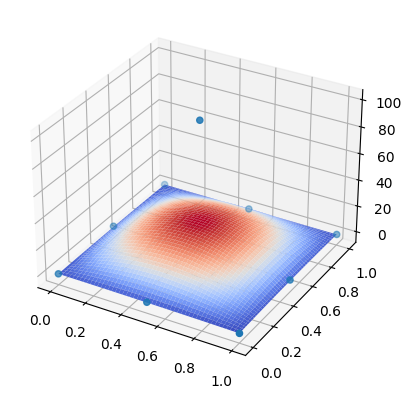

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
ax.scatter(surf.coefs()[:,0],surf.coefs()[:,1],surf.coefs()[:,2])
plt.show()

In [ ]:
gs.io.gsWriteParaview(surf,"/content/drive/MyDrive/Google Colab/pygismo_demo/output/surf")

This creates the files `surf0.vts` and `surf.pvd`. When we open `surf.pvd` in paraview, we see the surface.